In [10]:
from utils.analyze import load_data, detrend2D, wiener, sensor_function, sample_shape
from utils.plot import plot, ProfileBuilder, plot_profile
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.ndimage.filters import gaussian_filter
from scipy.interpolate import interpn
from skimage.restoration import richardson_lucy as de
%matplotlib notebook

In [11]:
x, y, z, T, t, settings = load_data("agglomerat2", range(1,15))
x = x[0]
y = y[0]
settings = settings[0]

In [12]:
def logscale(x, a=1):
    return np.log(x - x.min() + 1) ** (1/a)

<IPython.core.display.Javascript object>


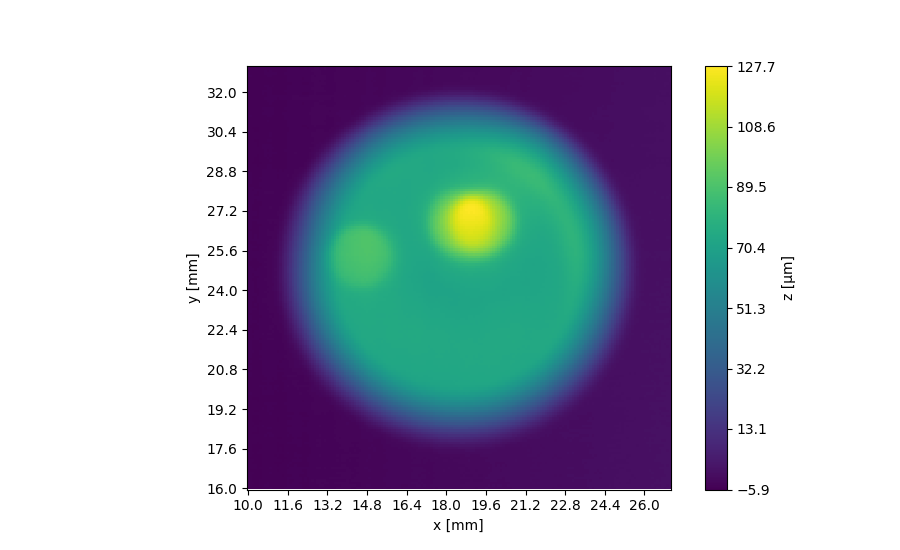

<IPython.core.display.Javascript object>


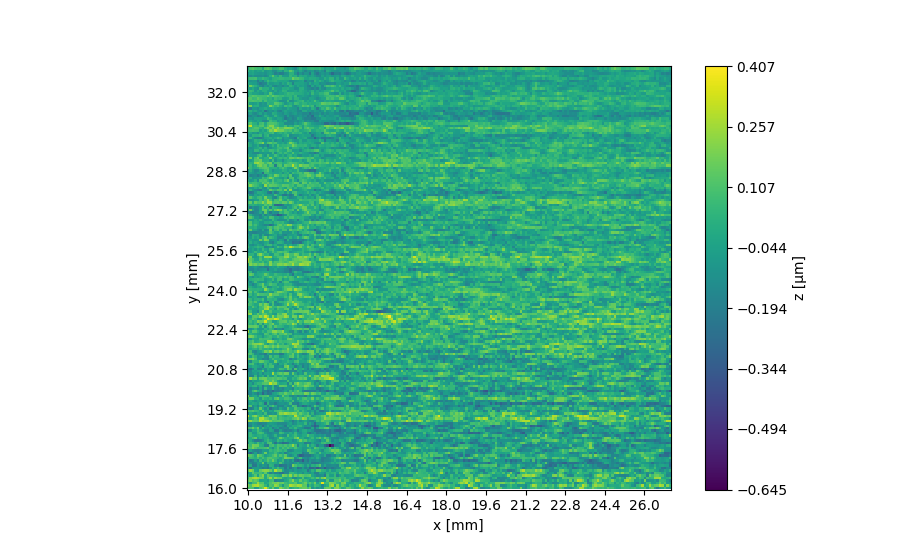

<IPython.core.display.Javascript object>


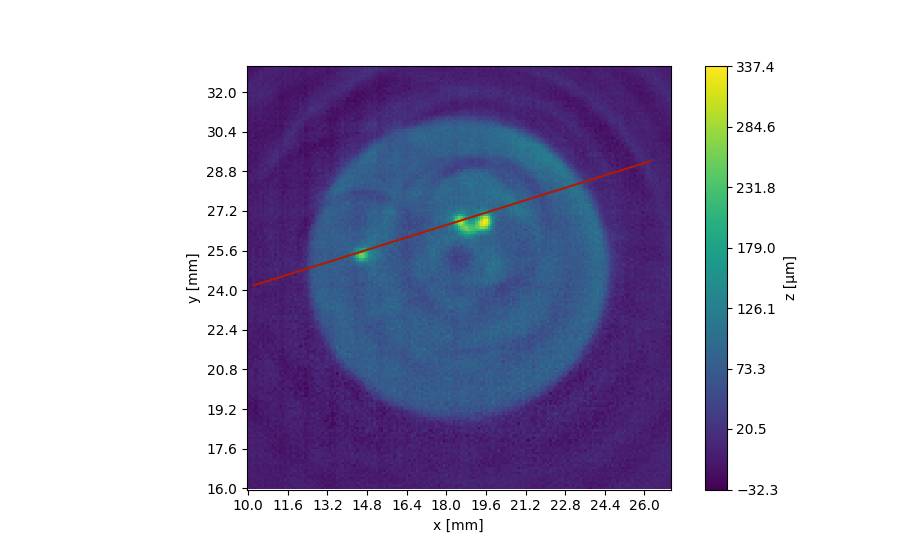

In [13]:
sensor = z[1][0].max() - z[1][0]
background = z[13][0].max() - z[13][0]
background2 = z[12][0].max() - z[12][0]
signal = sensor - background
noise = detrend2D(background - background2)
plot(x, y, signal)
plot(x, y, noise)

diameter = 2.57
sigma = 0.5
stepsize = settings['extent'][0][2]

kernel = sensor_function(diameter / stepsize, sigma)
z_reconstructed = wiener(signal, kernel, noise * 0.0005, 1, extra=6)
fig, ax = plot(x, y, z_reconstructed)
profile = ProfileBuilder(fig, ax)

<IPython.core.display.Javascript object>


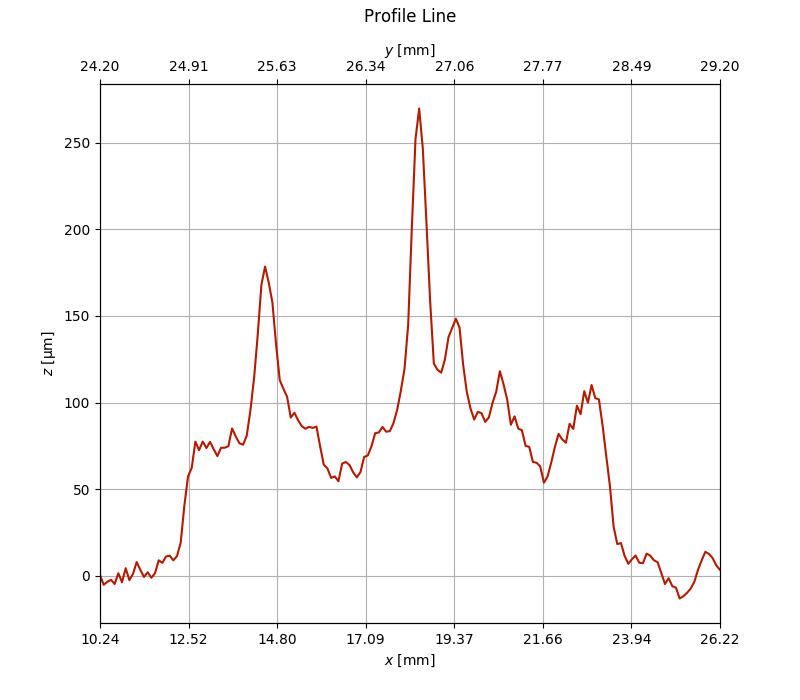

(<matplotlib.figure.Figure at 0x7f0fe0d1bfd0>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f0fe0d43ac8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f0fe0ee7710>))

In [14]:
plot_profile(x, y, z_reconstructed, *profile.coords)